<a href="https://colab.research.google.com/github/ShionMatsuoka/For_ExSeed/blob/main/DeBERTa_v3_SMALL_Starter_%5BCV_0_820_LB_0_790%5Dx_small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'learning-agency-lab-automated-essay-scoring-2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71485%2F8059942%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240624%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240624T174022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3d76b27e2521f779e663ebeb36634d62c1951e4a604d00dd7d8d0b3507388c5368af321736cb554b21634a5ad304f3f03ed196fe93dbe633e97c87e0b93a137f3d8066ab834336dc7b702cf9e7fcda9409e3efce117731f7c7a1548551e2254348e5b203d39ab309c0455d878a5a86054532da7fd1601614d3a7d13cacbc048bd4028ca6f25600c5958061aef029e55980cf6da5cb9c43e5a141bd962fb8a0fa5d8ce9c0f8ccbf1d0238a992d7769255a4e60a1d771eb442efa9a9146bc6bac84a98aacc061a55fcb45587937f34c5e291c8c2ac7b1e0463ff846ca99a7ad07833f8438e517d23da6e128426176cbf5e28a6436ec848fa67cbfd7769932a6b6c,huggingfacedebertav3variants:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2663421%2F4620664%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240624%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240624T174022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7772bb8c7282d334da689479bb4b88d073429a6670e1615234daefbcf727231a22fc035fda758257e6819d41f61685f296a56351e36c3ea8fee6edce6836d8055e2501c4376e12b77f9f91613bbe74571ee928c2f1fe7b0b3bb4756ab28225cd653266a2d7b206e424fda681c77456d888892d98a4b59a84a1ab97b55d2c9aac4290f63993c81484a83cb084225533e416f7c918532b327c30a7275fa468e7cd1750941dec2dda0981e2de15e764ce7d4324a4ff0e6d1d3cfd4c4a4fce31b2280e7eacad3c9a3323a890bdda919f92f214c6a6d22cf428d0534a2d2553917f90ef5100d626bd3b97cb0f99bcea0a0d7d792e0e2e9b9f6adf12daf63267985b31,deberta-v3-small-finetuned-v1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4888887%2F8241506%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240624%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240624T174022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D61fb2e274cad93c0610262d405d08c29b7dc8096bef00c2e1a0639133dea83790158dcaddd276c8a548894b5c463dcbebf1e3e795b9f5757ab25313f29dfe2ed511f624bdb22856b96785fdd5f3bdf2348e516fa41daeac1535c8c402e0fb5e8c211f3b92c1d6dd234b6f23e4d00a8ad2155cd6af116c188af936c2d9774369caebd4bfe247b9569a2bbabc997c7ce66290fbf537c72f9595691f187c9fc0c47e746b4891ec5a2c9a8156086df68843ed12e065c2e9163e0c865d827c0d7ca5a5c1b581d8d912ae3f48f79a78a6c642ee2bdd87d5d1ba24882eec35024e01ae430fda5619dcb068ecf28da515dfd6bbfe1f9a4384773c7f593775012799d26a0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12464821 bytes downloaded
Downloaded and uncompressed: learning-agency-lab-automated-essay-scoring-2
[==================================================] 11818652754 bytes downloaded
Downloaded and uncompressed: huggingfacedebertav3variants
[==================================================] 3194116559 bytes downloaded
Downloaded and uncompressed: deberta-v3-small-finetuned-v1
Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

# Google Driveの保存先パスを設定
google_drive_path = '/content/drive/My Drive/kaggle_data'

# KaggleからダウンロードしたデータをGoogle Driveにコピー
os.makedirs(google_drive_path, exist_ok=True)
shutil.copytree('/kaggle/input', google_drive_path, dirs_exist_ok=True)

print(f'Data copied to Google Drive at {google_drive_path}')

Data copied to Google Drive at /content/drive/My Drive/kaggle_data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil

# Google Driveのパスを設定
google_drive_path = '/content/drive/My Drive/kaggle_data'

# Google DriveからKaggleのデータを/content/kaggle/inputにコピー
kaggle_input_path = '/content/kaggle/input'

# 既存の入力ディレクトリを削除して再作成
shutil.rmtree(kaggle_input_path, ignore_errors=True)
os.makedirs(kaggle_input_path, exist_ok=True)

# Google Driveからデータをコピー
shutil.copytree(google_drive_path, kaggle_input_path, dirs_exist_ok=True)

print(f'Data restored from Google Drive at {kaggle_input_path}')

Mounted at /content/drive
Data restored from Google Drive at /content/kaggle/input


# DeBERTa-v3-SMALL Regression Starter
This notebook is a fork from Yuto_H's great notebook [here][1]. If you like my notebook, remember to upvote Yuto's notebook too. In this notebook we add the following modifications which are explained in my discussion post [here][3]:
* Change model to `DeBERTa-v3-small` for fast experiments (Note that `xsmall` works well too)
* Increase token `max_length to 1024` (instead of 512 to include all essay text)
* Use total `train batch size = 8`, valid batch size 16 (Note `batch per gpu = 4` and we have 2xT4 GPU)
* Train `4 epochs linear` with start `LR = 1e-5` and `no warmup`
* Remove seed everything (I like randomness)
* Add `QWK metric for regression`
* Add `new tokens` to tokenizer because DeBERTa removes "new paragraph" and "double space" from essay
* `Remove dropout` for regression
* Save `full OOF` predictions
* Add `test inference` and `LB submit`
* Achieves surprising `CV = 0.822` WOW! and LB = ??? (submitting now, let's see what LB is...)

For training, this notebook averages 1 hour per fold which is 15 minutes per epoch training on 2xT4 Kaggle GPU. (Training is done in version 1. And inference and submit to LB is done in version 2).

# Version Notes
In version 1, we finetune a new DeBERTa-v3-SMALL and save it to the Kaggle dataset [here][4]. Therefore if you want to see training epoch details, view notebook version 1. This took 6 hours using Kaggle's 2xT4 GPU.

In notebook version 2, we load the saved fold models and infer test data and submit to LB. Version 2 runs quickly because it is only inference. It will run in either 6 minutes or 1 minute depending on whether we infer OOF and compute CV score again.

If we want version 2 inference to run more quickly, we can set `COMPUTE_CV = False` below, then we will not use 5 minutes to predict OOF and compute CV score. Instead we will only infer test data.

[1]: https://www.kaggle.com/code/hashidoyuto/deberta-baseline-aes2-0-train
[2]: https://www.kaggle.com/code/hashidoyuto/deberta-v3-base-aes2-0-infer
[3]: https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/discussion/497832
[4]: https://www.kaggle.com/datasets/cdeotte/deberta-v3-small-finetuned-v1

# Imports and Config
Import libraries and define configuration parameters here.

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

# True USES REGRESSION, False USES CLASSIFICATION
USE_REGRESSION = True

# VERSION NUMBER FOR NAMING OF SAVED MODELS
VER=1

# IF "LOAD_FROM" IS None, THEN WE TRAIN NEW MODELS
LOAD_FROM = "/content/kaggle/input/deberta-v3-small-finetuned-v1/"

# WHEN TRAINING NEW MODELS SET COMPUTE_CV = True
# WHEN LOADING MODELS, WE CAN CHOOSE True or False
COMPUTE_CV = True

In [3]:
!pip install datasets

In [4]:
import warnings
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorWithPadding
from datasets import Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from tokenizers import AddedToken
warnings.simplefilter('ignore')

In [5]:
class PATHS:
    train_path = '/content/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv'
    test_path = '/content/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv'
    sub_path = '/content/kaggle/input/learning-agency-lab-automated-essay-scoring-2/sample_submission.csv'
    model_path = "/content/kaggle/input/huggingfacedebertav3variants/deberta-v3-xsmall"

In [6]:
class CFG:
    n_splits = 5
    seed = 42
    max_length = 1024
    lr = 1e-5
    train_batch_size = 4
    eval_batch_size = 8
    train_epochs = 4
    weight_decay = 0.01
    warmup_ratio = 0.0
    num_labels = 6

In [7]:
def seed_everything(seed):
    import random, os
    import numpy as np
    import torch

    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

#seed_everything(seed=CFG.seed)

# Data Tokenization
We use `max_length = 1024` to avoid truncating majority of essays.

In [8]:
class Tokenize(object):
    def __init__(self, train, valid, tokenizer):
        self.tokenizer = tokenizer
        self.train = train
        self.valid = valid

    def get_dataset(self, df):
        ds = Dataset.from_dict({
                'essay_id': [e for e in df['essay_id']],
                'full_text': [ft for ft in df['full_text']],
                'label': [s for s in df['label']],
            })
        return ds

    def tokenize_function(self, example):
        tokenized_inputs = self.tokenizer(
            example['full_text'], truncation=True, max_length=CFG.max_length
        )
        return tokenized_inputs

    def __call__(self):
        train_ds = self.get_dataset(self.train)
        valid_ds = self.get_dataset(self.valid)

        tokenized_train = train_ds.map(
            self.tokenize_function, batched=True
        )
        tokenized_valid = valid_ds.map(
            self.tokenize_function, batched=True
        )

        return tokenized_train, tokenized_valid, self.tokenizer

# Compute Metrics
Below we provide compute metric function for both regression and classification. In this notebook we will use regression.

In [9]:
def compute_metrics_for_regression(eval_pred):

    predictions, labels = eval_pred
    qwk = cohen_kappa_score(labels, predictions.clip(0,5).round(0), weights='quadratic')
    results = {
        'qwk': qwk
    }
    return results

In [10]:
def compute_metrics_for_classification(eval_pred):

    predictions, labels = eval_pred
    qwk = cohen_kappa_score(labels, predictions.argmax(-1), weights='quadratic')
    results = {
        'qwk': qwk
    }
    return results

In [11]:
# !ls /content/kaggle/input/learning-agency-lab-automated-essay-scoring-2/
# print(PATHS.train_path)

sample_submission.csv  test.csv  train.csv
/content/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv


# Load Data and Set Fold
For our label, we will use `label = score - 1`. Then the labels will range from 0 to 5. For regression, we convert the label to `float32`. For classification, we would convert to `int32`.

In [12]:
data = pd.read_csv(PATHS.train_path)

data['label'] = data['score'].apply(lambda x: x-1)
if USE_REGRESSION: data["label"] = data["label"].astype('float32')
else: data["label"] = data["label"].astype('int32')

skf = StratifiedKFold(n_splits=CFG.n_splits, shuffle=True, random_state=CFG.seed)
for i, (_, val_index) in enumerate(skf.split(data, data["score"])):
    data.loc[val_index, "fold"] = i
data.head()

,essay_id,full_text,score,label,fold
0,000d118,Many people have car where they live. The thin...,3,2.0,3.0
1,000fe60,I am a scientist at NASA that is discussing th...,3,2.0,4.0
2,001ab80,People always wish they had the same technolog...,4,3.0,1.0
3,001bdc0,"We all heard about Venus, the planet without a...",4,3.0,0.0
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2.0,2.0


In [13]:
!pip uninstall transformers accelerate -y
!pip install transformers[torch] accelerate -U

Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 30.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached

In [ ]:
!pip install -U transformers accelerate

In [ ]:
!pip install transformers[torch] accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip show transformers

Name: transformers
Version: 4.41.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [ ]:
!pip show accelerate

Name: accelerate
Version: 0.31.0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 


# Set Training Args
We use `fp16=True` which uses mixed precision and uses less GPU VRAM and makes training faster. We use `per_device_train_batch_size = (8 / number of gpus)` because we want total train batch size to be 8. With Kaggle T4, we have 2xT4 GPUs and use `per_device_train_batch_size = 4`.

In [14]:
training_args = TrainingArguments(
    output_dir=f'output_v{VER}',
    fp16=True,
    learning_rate=CFG.lr,
    per_device_train_batch_size=CFG.train_batch_size,
    per_device_eval_batch_size=CFG.eval_batch_size,
    num_train_epochs=CFG.train_epochs,
    weight_decay=CFG.weight_decay,
    evaluation_strategy='epoch',
    metric_for_best_model='qwk',
    save_strategy='epoch',
    save_total_limit=1,
    load_best_model_at_end=True,
    report_to='none',
    warmup_ratio=CFG.warmup_ratio,
    lr_scheduler_type='linear', # "cosine" or "linear" or "constant"
    optim='adamw_torch',
    logging_first_step=True,
)

# K Fold Training
We add new tokens for ("\n") new paragraph and (" "*2) double space because the default DeBERTa tokenizer removes these but these are helpful for scoring essays. We remove dropout from our model because this does not work well when using regression. Read discussion [here][1]

[1]: https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/discussion/497832

In [ ]:
# !ls /content/kaggle/input/huggingfacedebertav3variants
!ls /content/kaggle/input/huggingfacedebertav3variants/deberta-v3-xsmall

config.json	       pytorch_model.bin	    spm.model
generator_config.json  pytorch_model.generator.bin  tf_model.h5
gitattributes.txt      README.md		    tokenizer_config.json


Map:   0%|          | 0/13845 [00:00<?, ? examples/s]

Map:   0%|          | 0/3462 [00:00<?, ? examples/s]

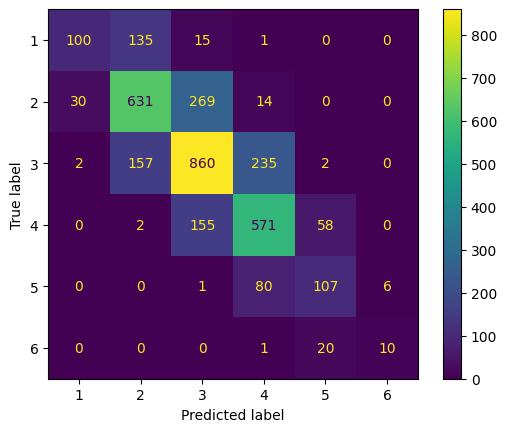

Map:   0%|          | 0/13845 [00:00<?, ? examples/s]

Map:   0%|          | 0/3462 [00:00<?, ? examples/s]

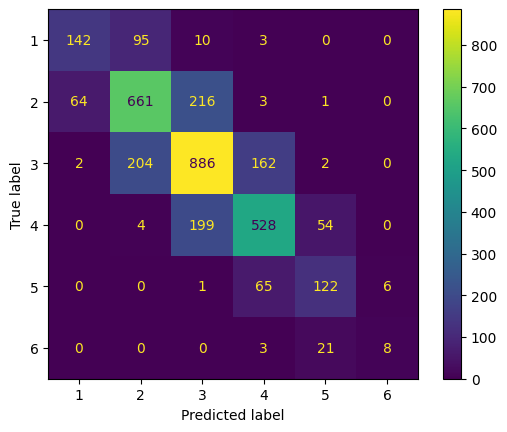

Map:   0%|          | 0/13846 [00:00<?, ? examples/s]

Map:   0%|          | 0/3461 [00:00<?, ? examples/s]

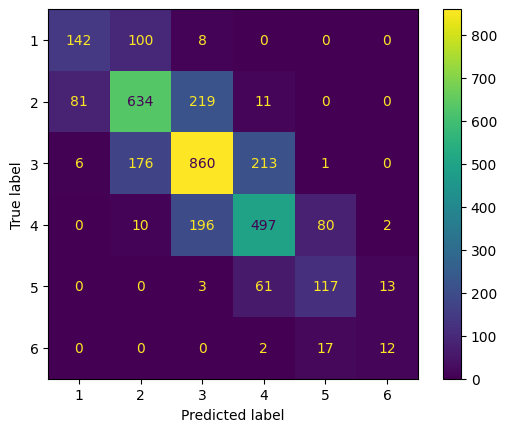

Map:   0%|          | 0/13846 [00:00<?, ? examples/s]

Map:   0%|          | 0/3461 [00:00<?, ? examples/s]

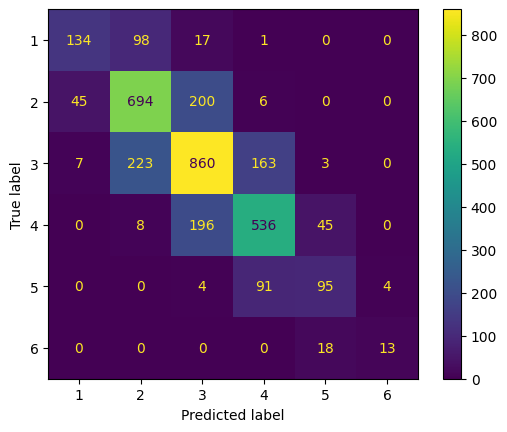

Map:   0%|          | 0/13846 [00:00<?, ? examples/s]

Map:   0%|          | 0/3461 [00:00<?, ? examples/s]

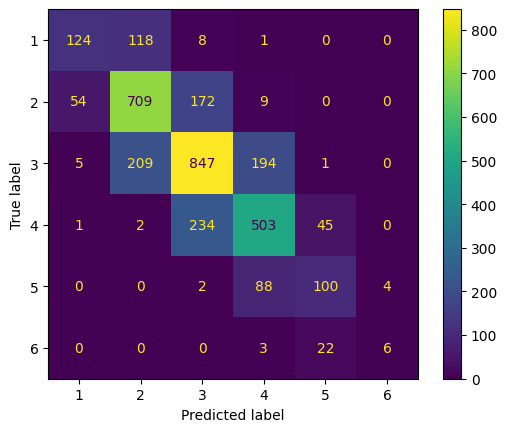

In [15]:
if COMPUTE_CV:
    for fold in range(len(data['fold'].unique())):

        # GET TRAIN AND VALID DATA
        train = data[data['fold'] != fold]
        valid = data[data['fold'] == fold].copy()

        # ADD NEW TOKENS for ("\n") new paragraph and (" "*2) double space
        tokenizer = AutoTokenizer.from_pretrained(PATHS.model_path)
        tokenizer.add_tokens([AddedToken("\n", normalized=False)])
        tokenizer.add_tokens([AddedToken(" "*2, normalized=False)])
        tokenize = Tokenize(train, valid, tokenizer)
        tokenized_train, tokenized_valid, _ = tokenize()

        # REMOVE DROPOUT FROM REGRESSION
        config = AutoConfig.from_pretrained(PATHS.model_path)
        if USE_REGRESSION:
            config.attention_probs_dropout_prob = 0.0
            config.hidden_dropout_prob = 0.0
            config.num_labels = 1
        else: config.num_labels = CFG.num_labels

        if LOAD_FROM:
            model = AutoModelForSequenceClassification.from_pretrained(LOAD_FROM + f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
        else:
            model = AutoModelForSequenceClassification.from_pretrained(PATHS.model_path, config=config)
            model.resize_token_embeddings(len(tokenizer))

        # TRAIN WITH TRAINER
        data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
        if USE_REGRESSION: compute_metrics = compute_metrics_for_regression
        else: compute_metrics = compute_metrics_for_classification
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=tokenized_train,
            eval_dataset=tokenized_valid,
            data_collator=data_collator,
            tokenizer=tokenizer,
            compute_metrics=compute_metrics
        )
        if LOAD_FROM is None:
            trainer.train()

        # PLOT CONFUSION MATRIX
        y_true = valid['score'].values
        predictions0 = trainer.predict(tokenized_valid).predictions
        if USE_REGRESSION: predictions = predictions0.round(0) + 1
        else: predictions = predictions0.argmax(axis=1) + 1
        cm = confusion_matrix(y_true, predictions, labels=[x for x in range(1,7)])
        draw_cm = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=[x for x in range(1,7)])
        draw_cm.plot()
        plt.show()

        # SAVE FOLD MODEL AND TOKENIZER
        if LOAD_FROM is None:
            trainer.save_model(f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
            tokenizer.save_pretrained(f'deberta-v3-small_AES2_fold_{fold}_v{VER}')

        # SAVE OOF PREDICTIONS
        if USE_REGRESSION:
            valid['pred'] = predictions0 + 1
        else:
            COLS = [f'p{x}' for x in range(CFG.num_labels)]
            valid[COLS] = predictions0
        valid.to_csv(f'valid_df_fold_{fold}_v{VER}.csv', index=False)

Map:   0%|          | 0/13845 [00:00<?, ? examples/s]

Map:   0%|          | 0/3462 [00:00<?, ? examples/s]

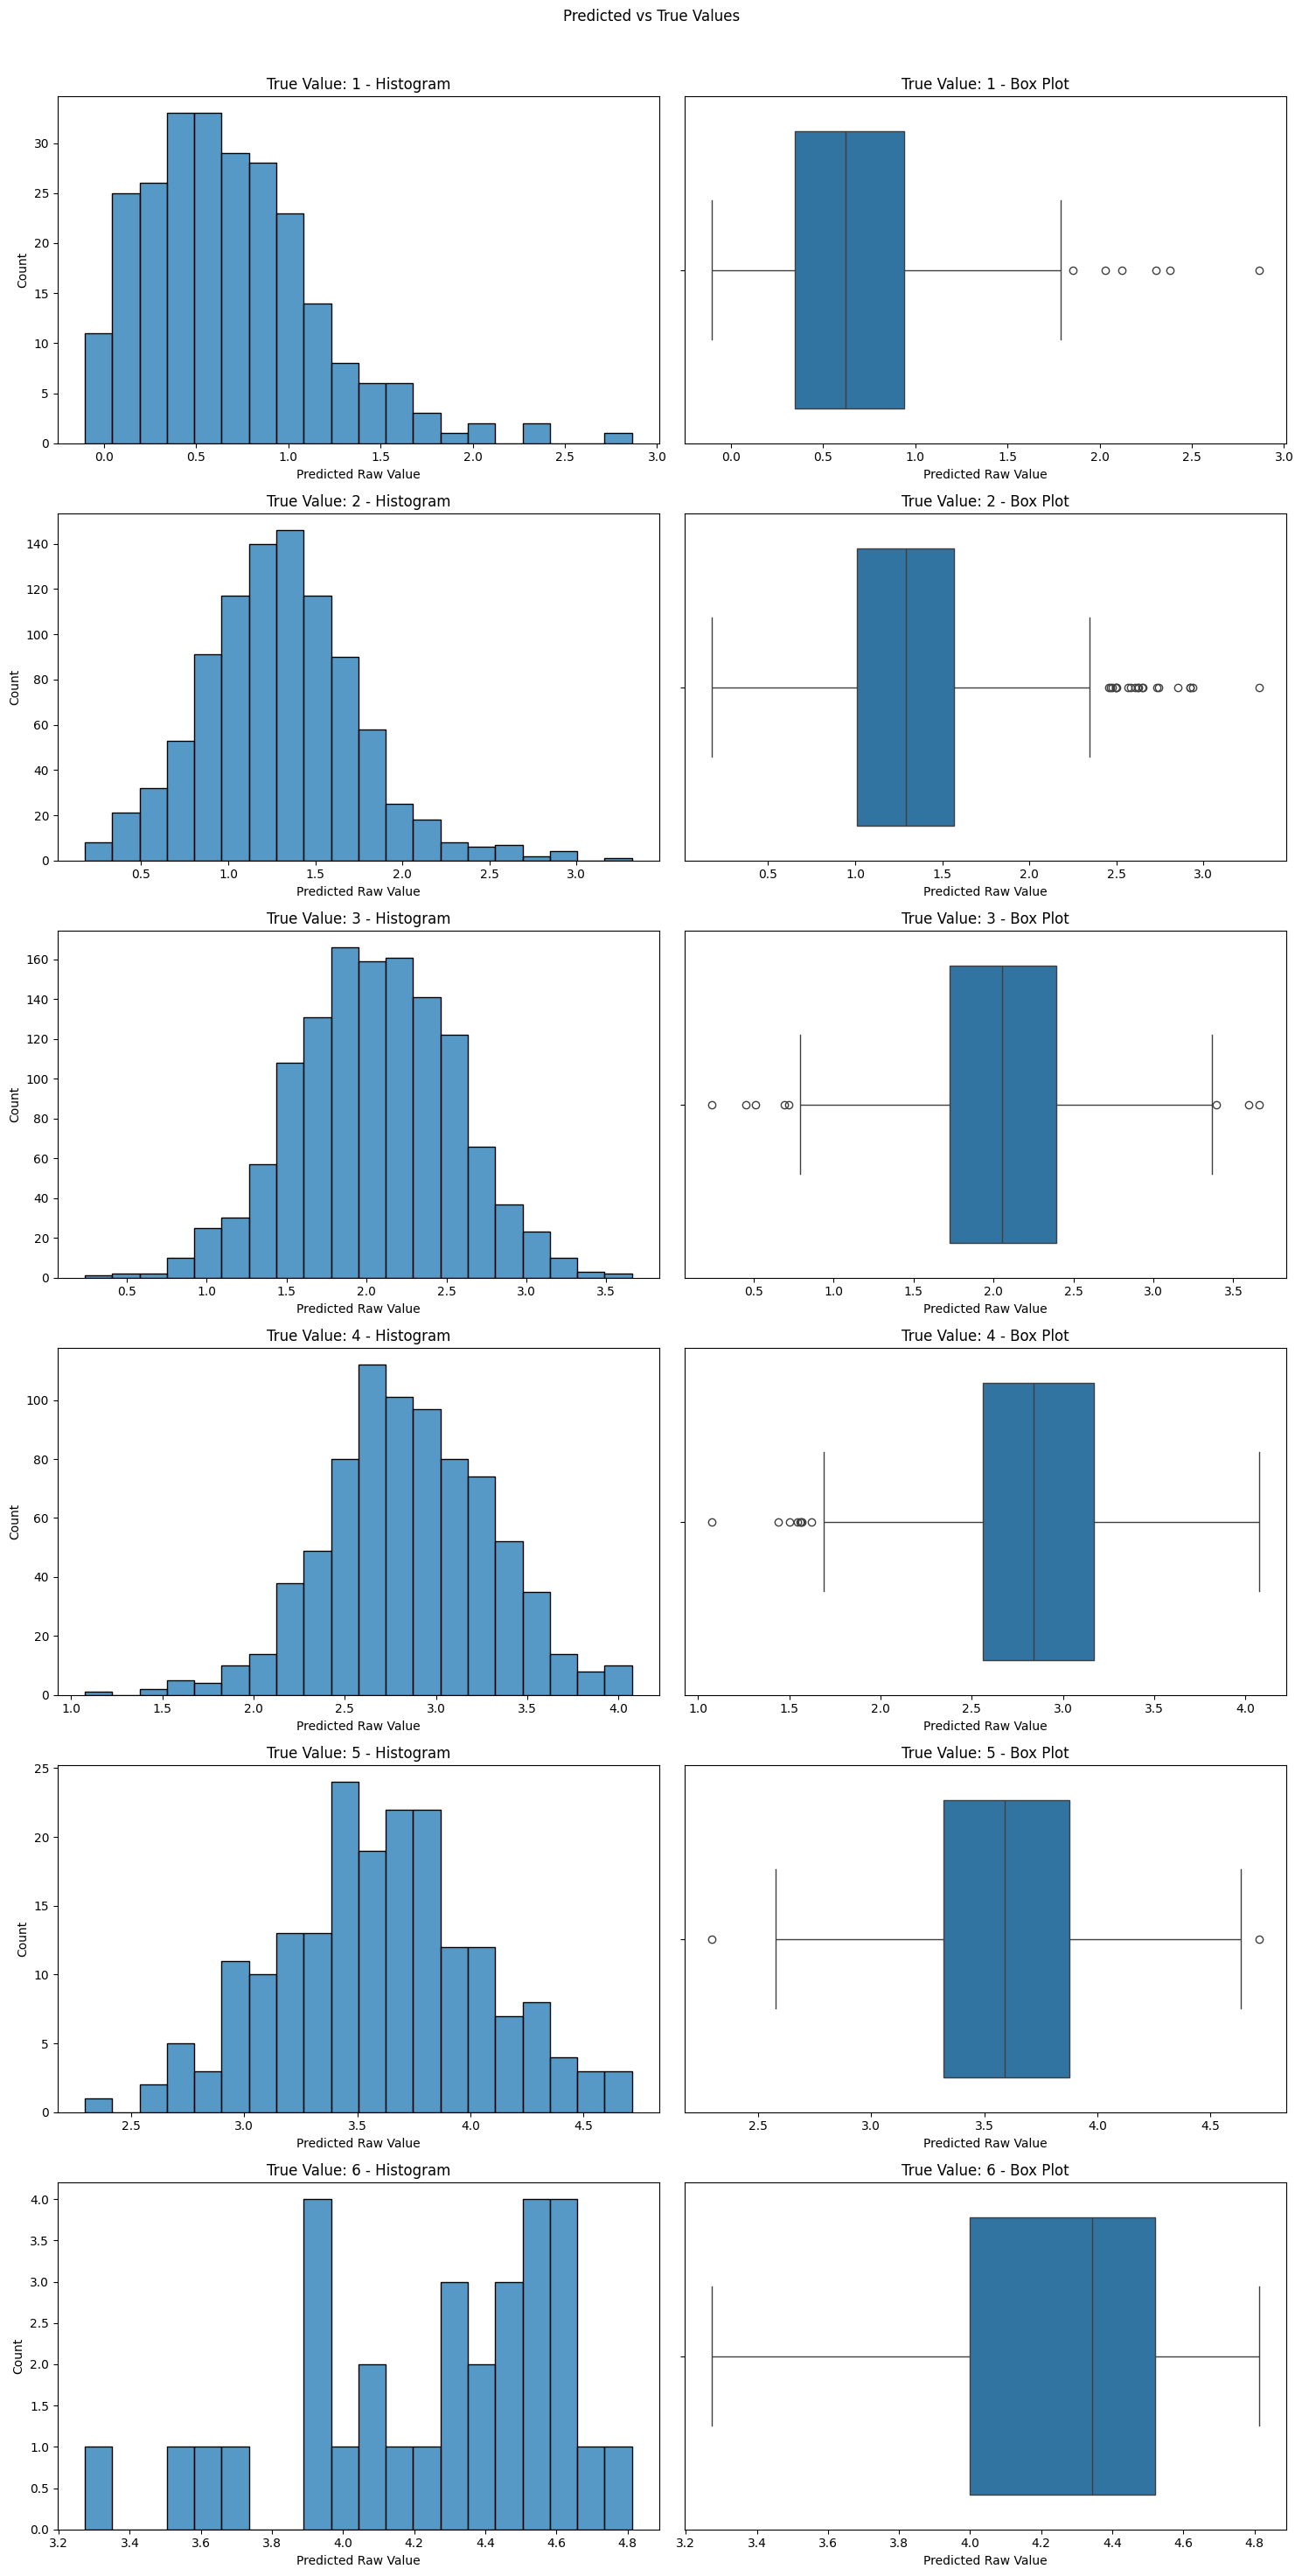

Map:   0%|          | 0/13845 [00:00<?, ? examples/s]

Map:   0%|          | 0/3462 [00:00<?, ? examples/s]

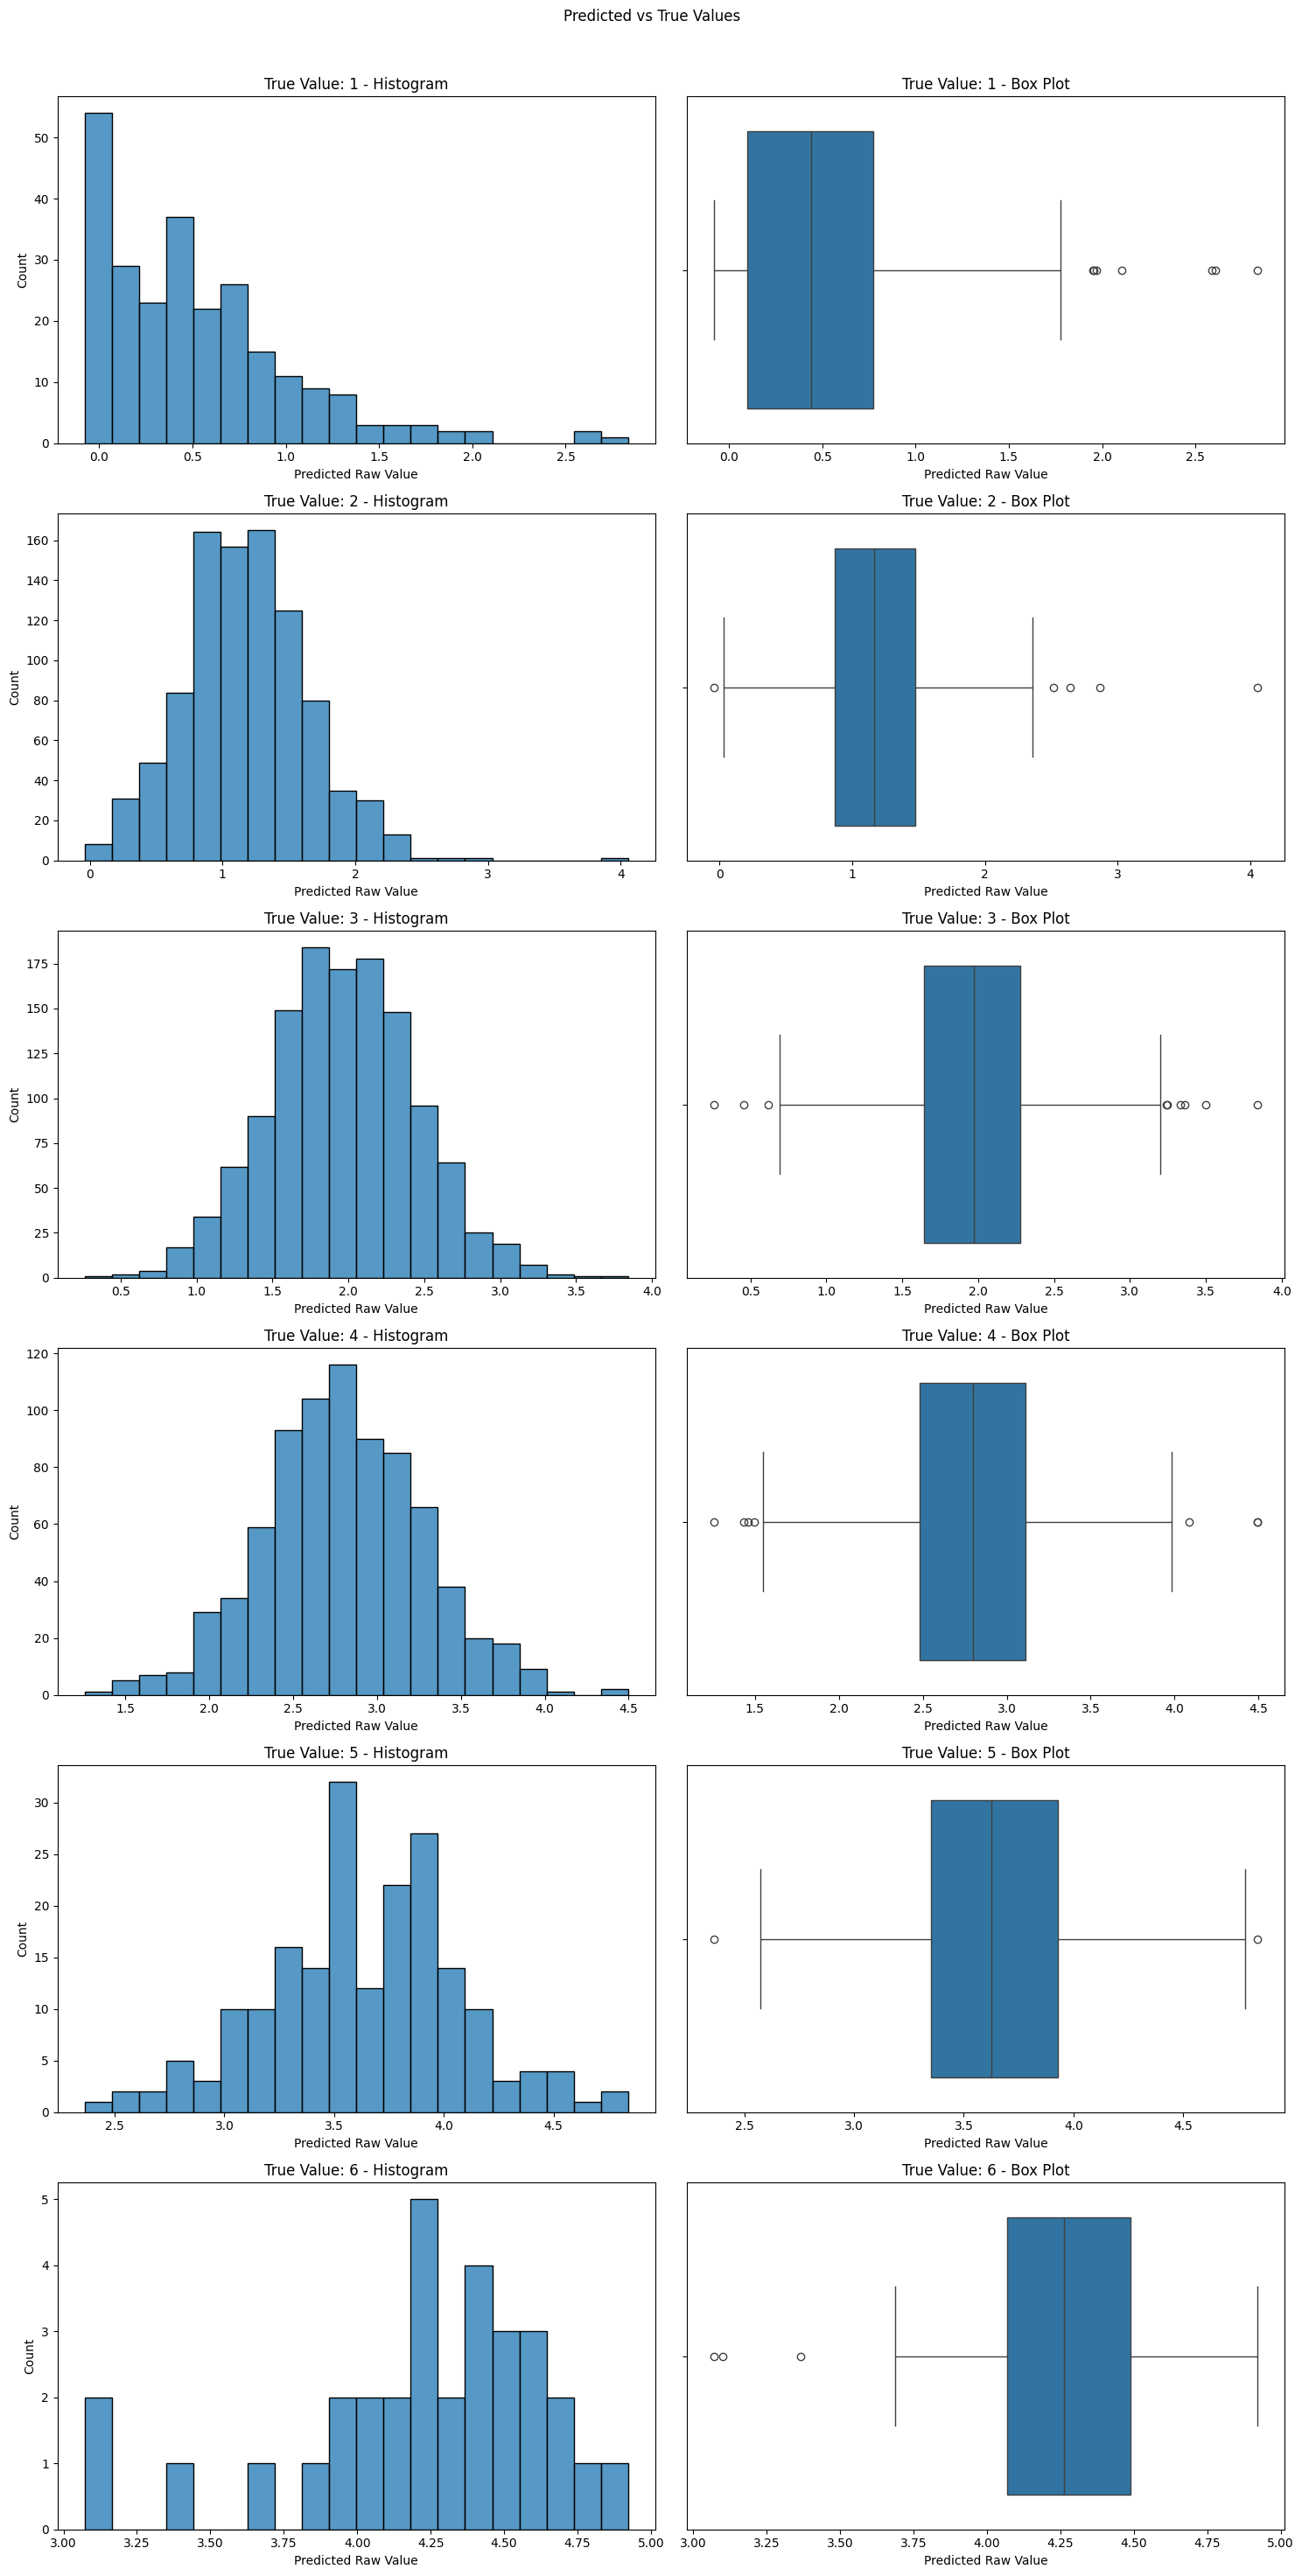

Map:   0%|          | 0/13846 [00:00<?, ? examples/s]

Map:   0%|          | 0/3461 [00:00<?, ? examples/s]

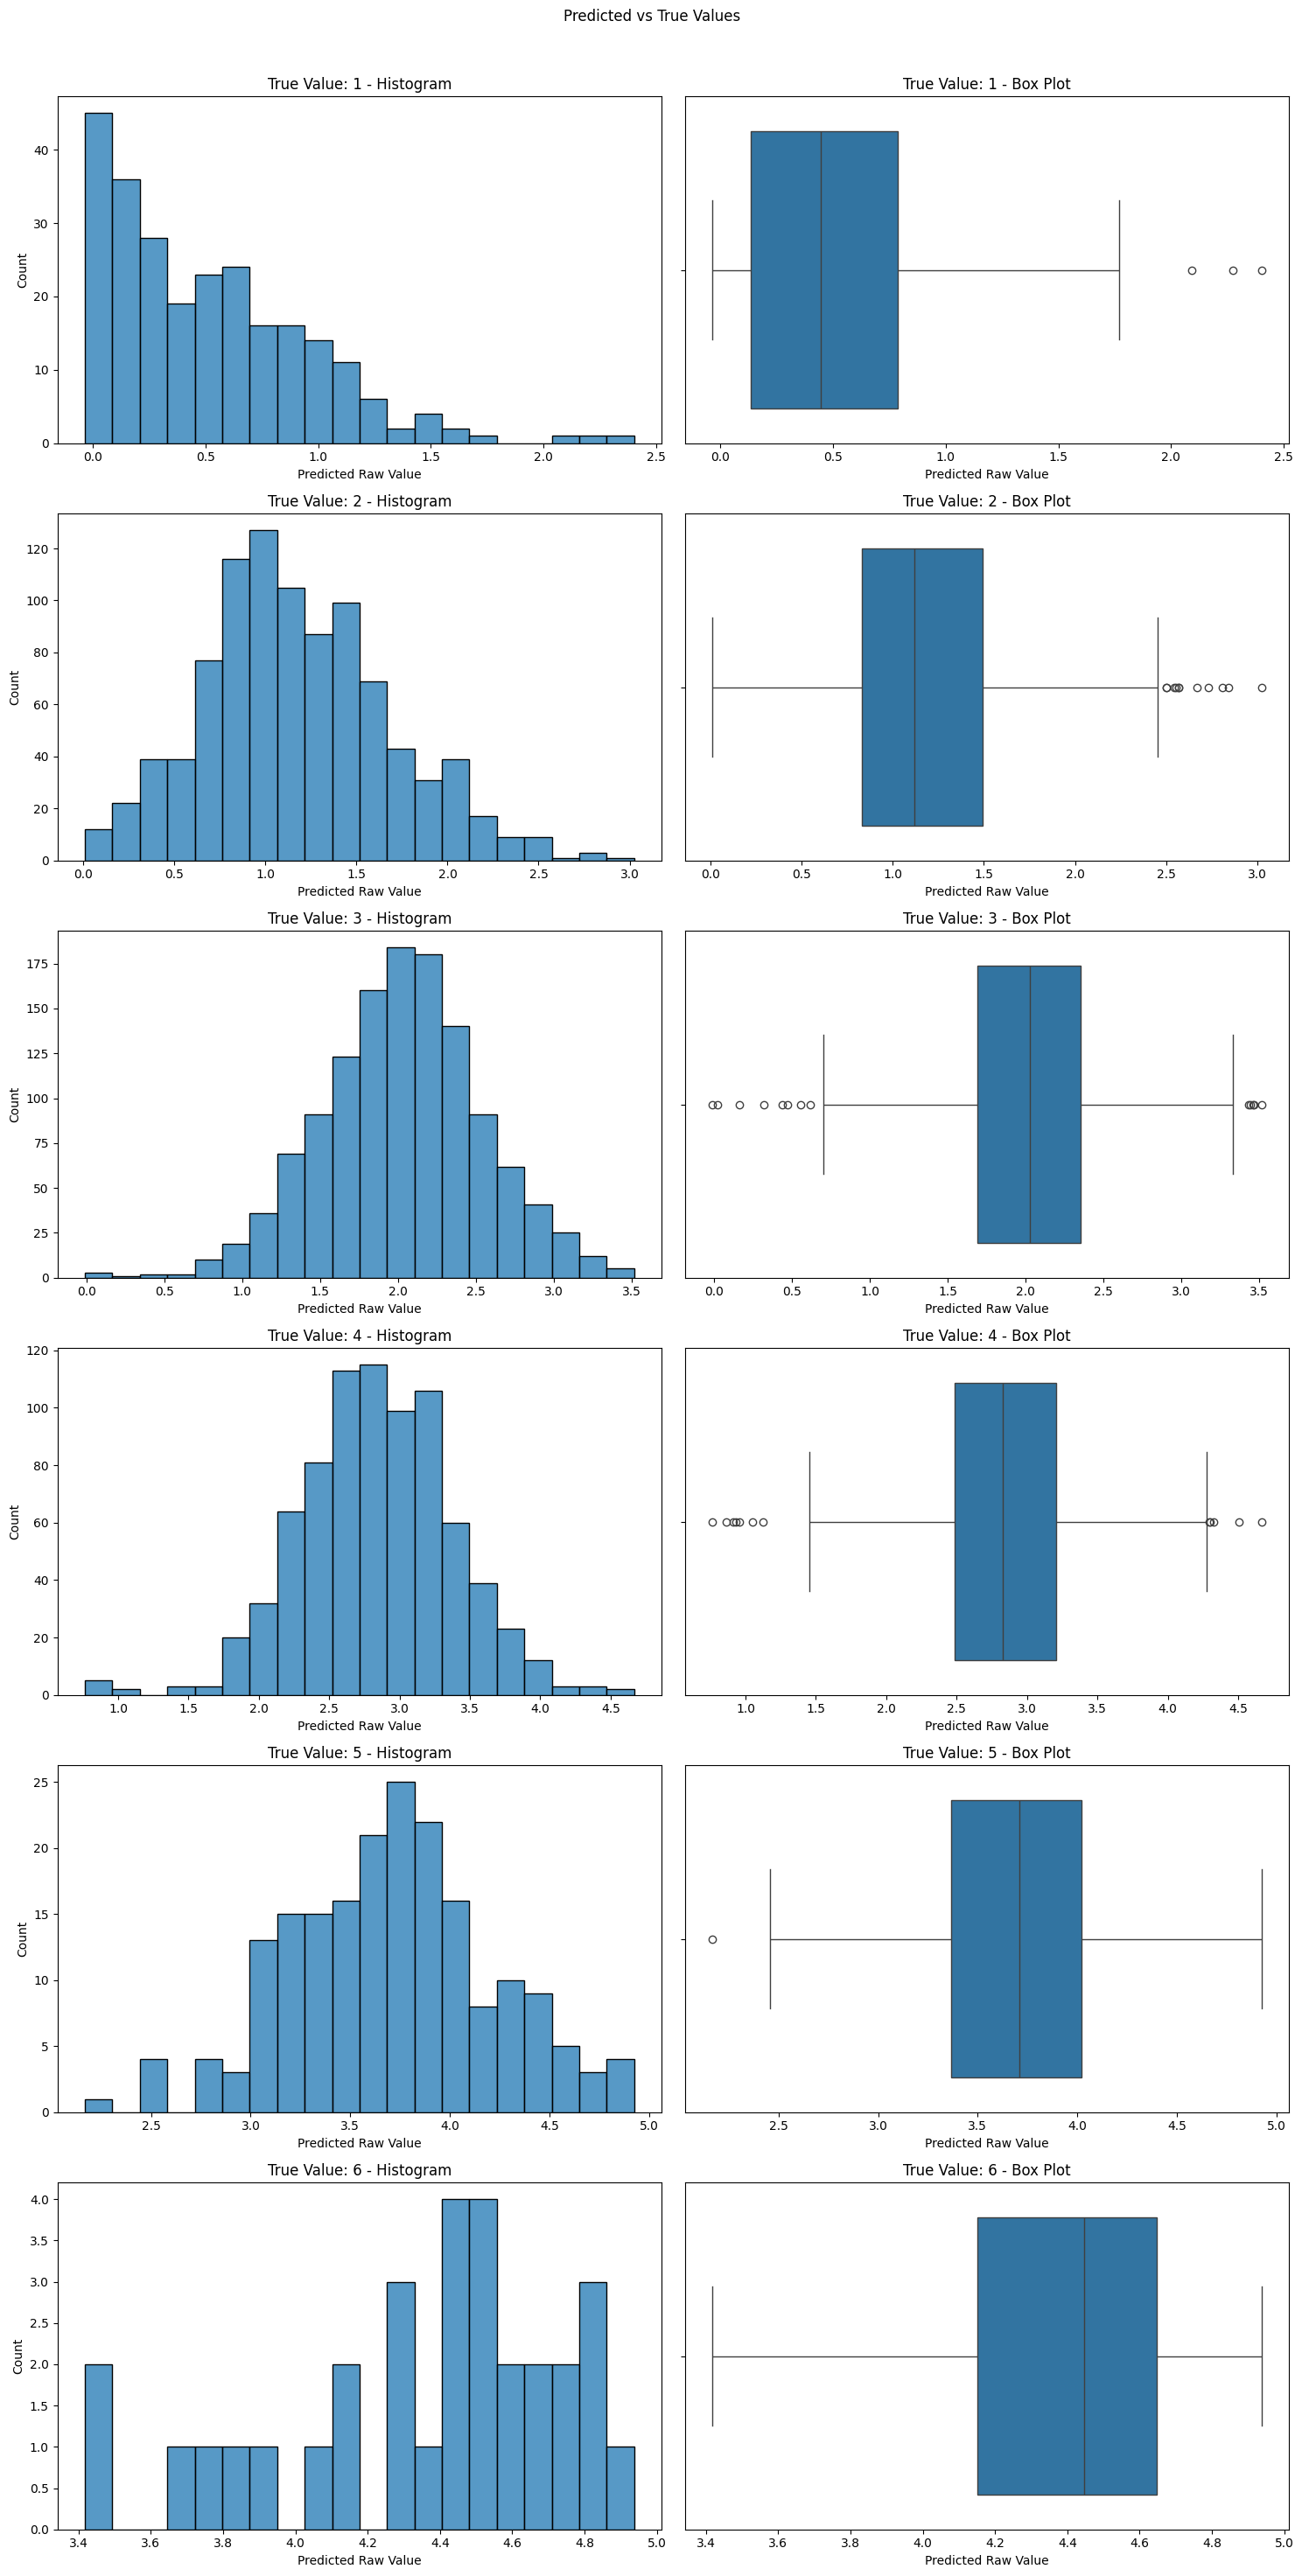

Map:   0%|          | 0/13846 [00:00<?, ? examples/s]

Map:   0%|          | 0/3461 [00:00<?, ? examples/s]

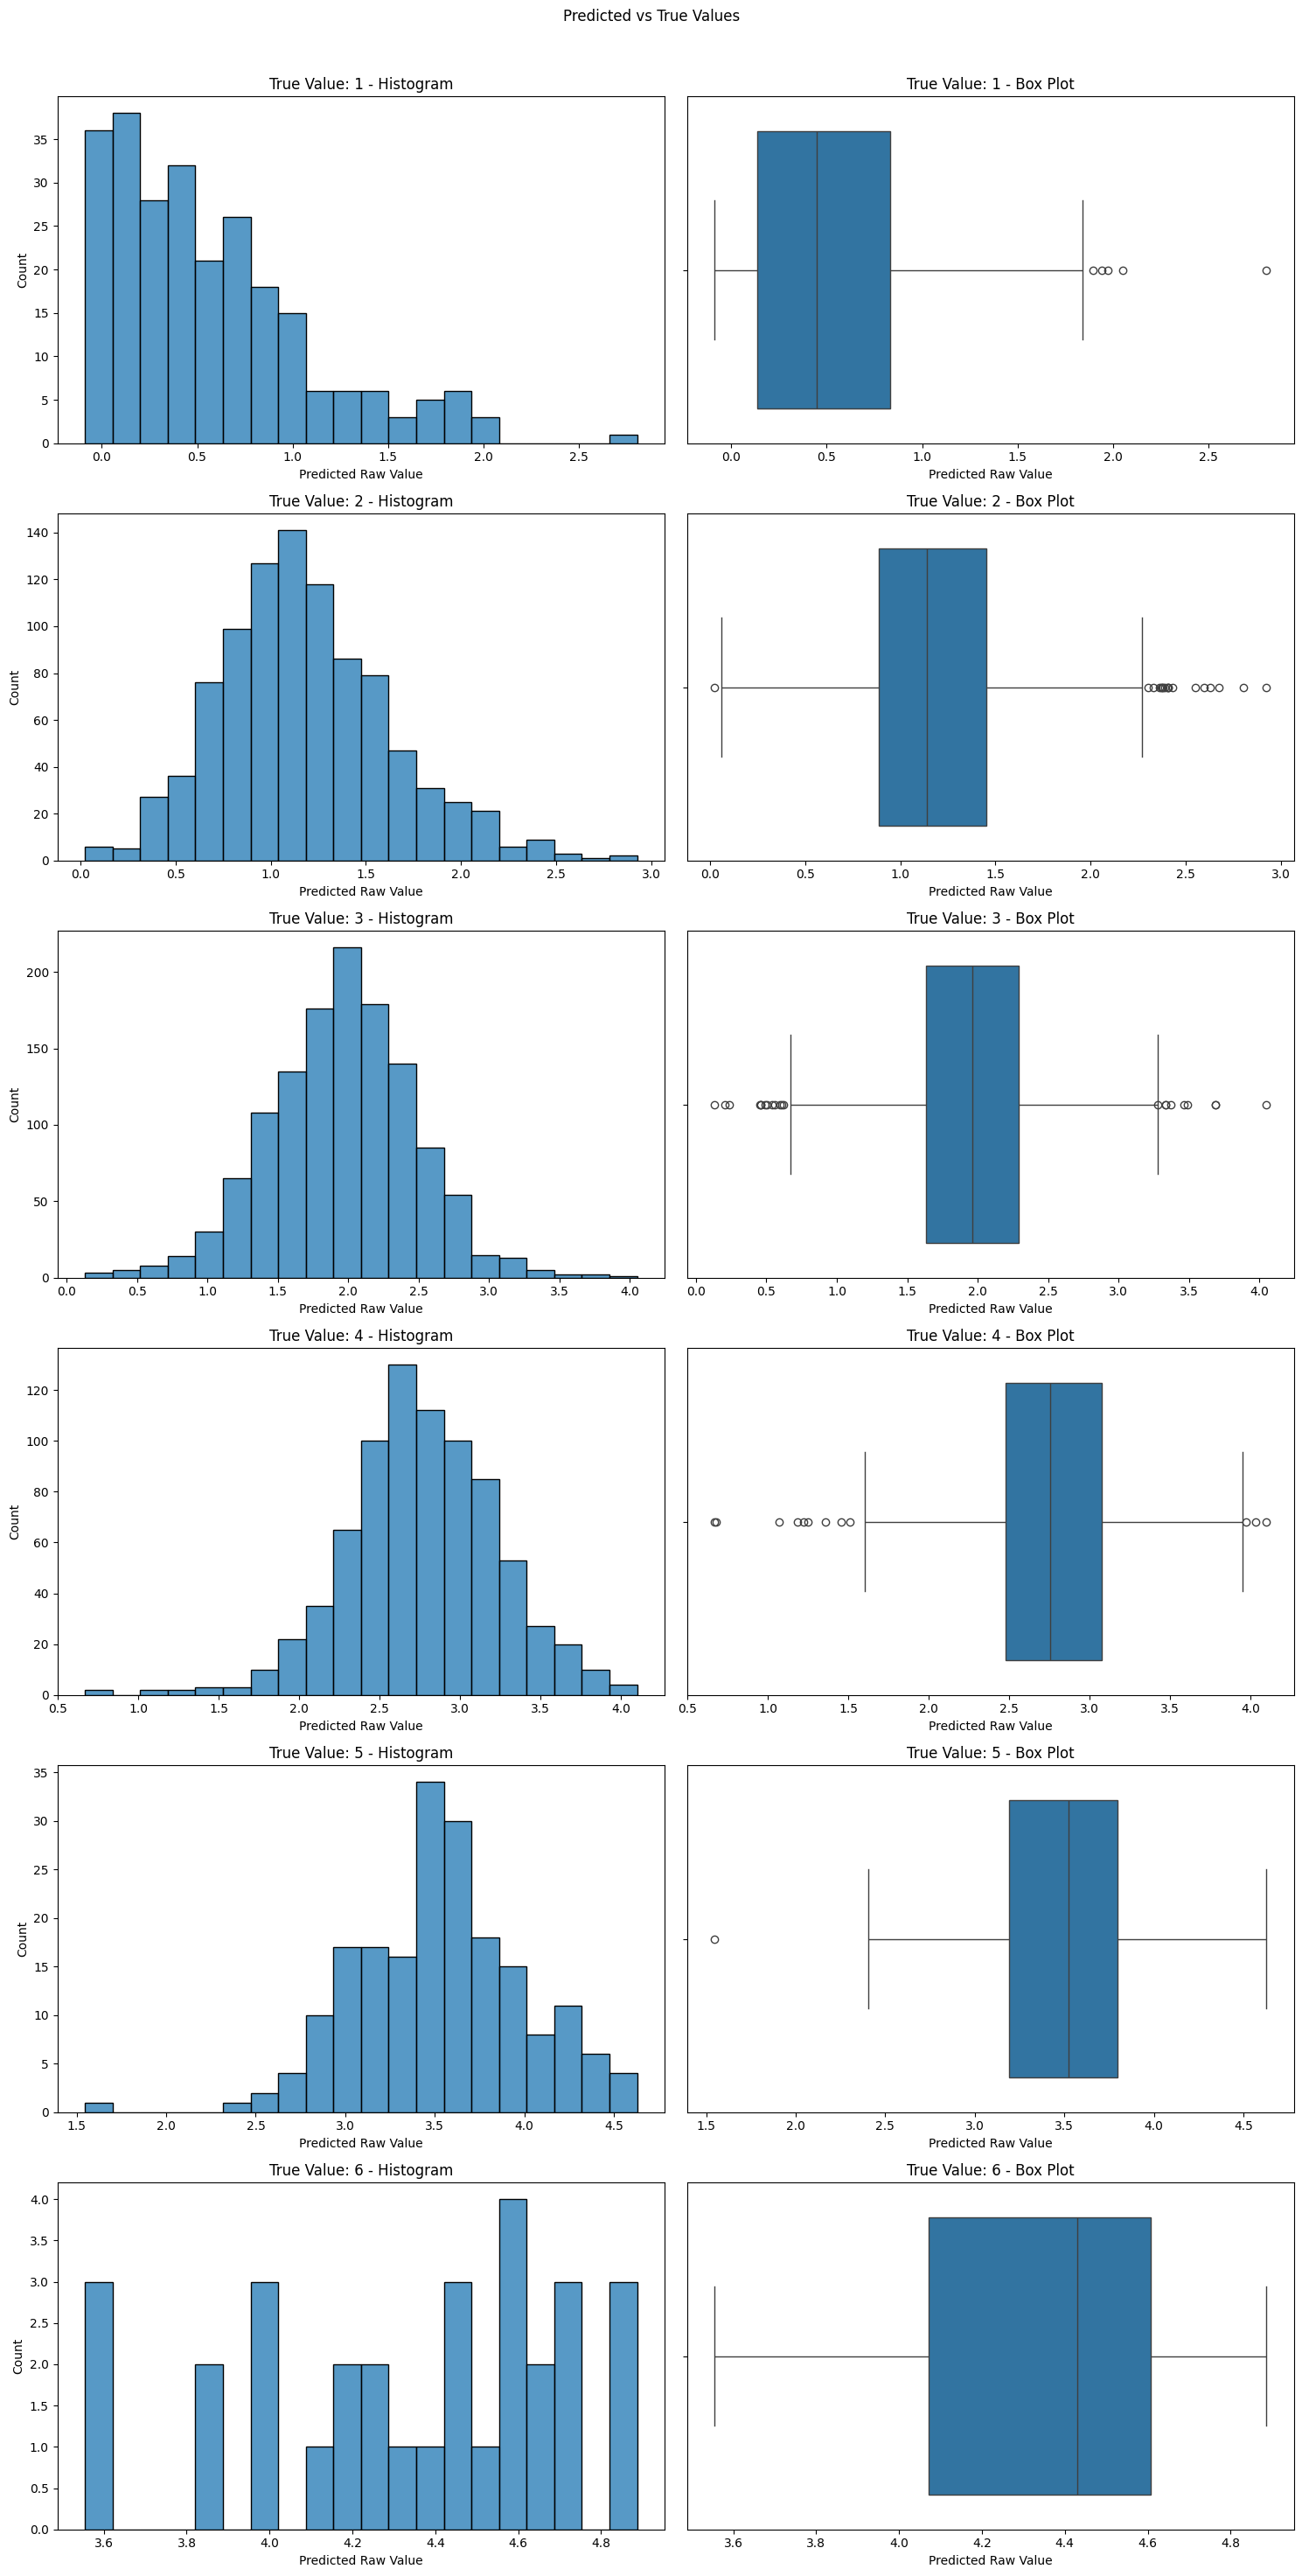

Map:   0%|          | 0/13846 [00:00<?, ? examples/s]

Map:   0%|          | 0/3461 [00:00<?, ? examples/s]

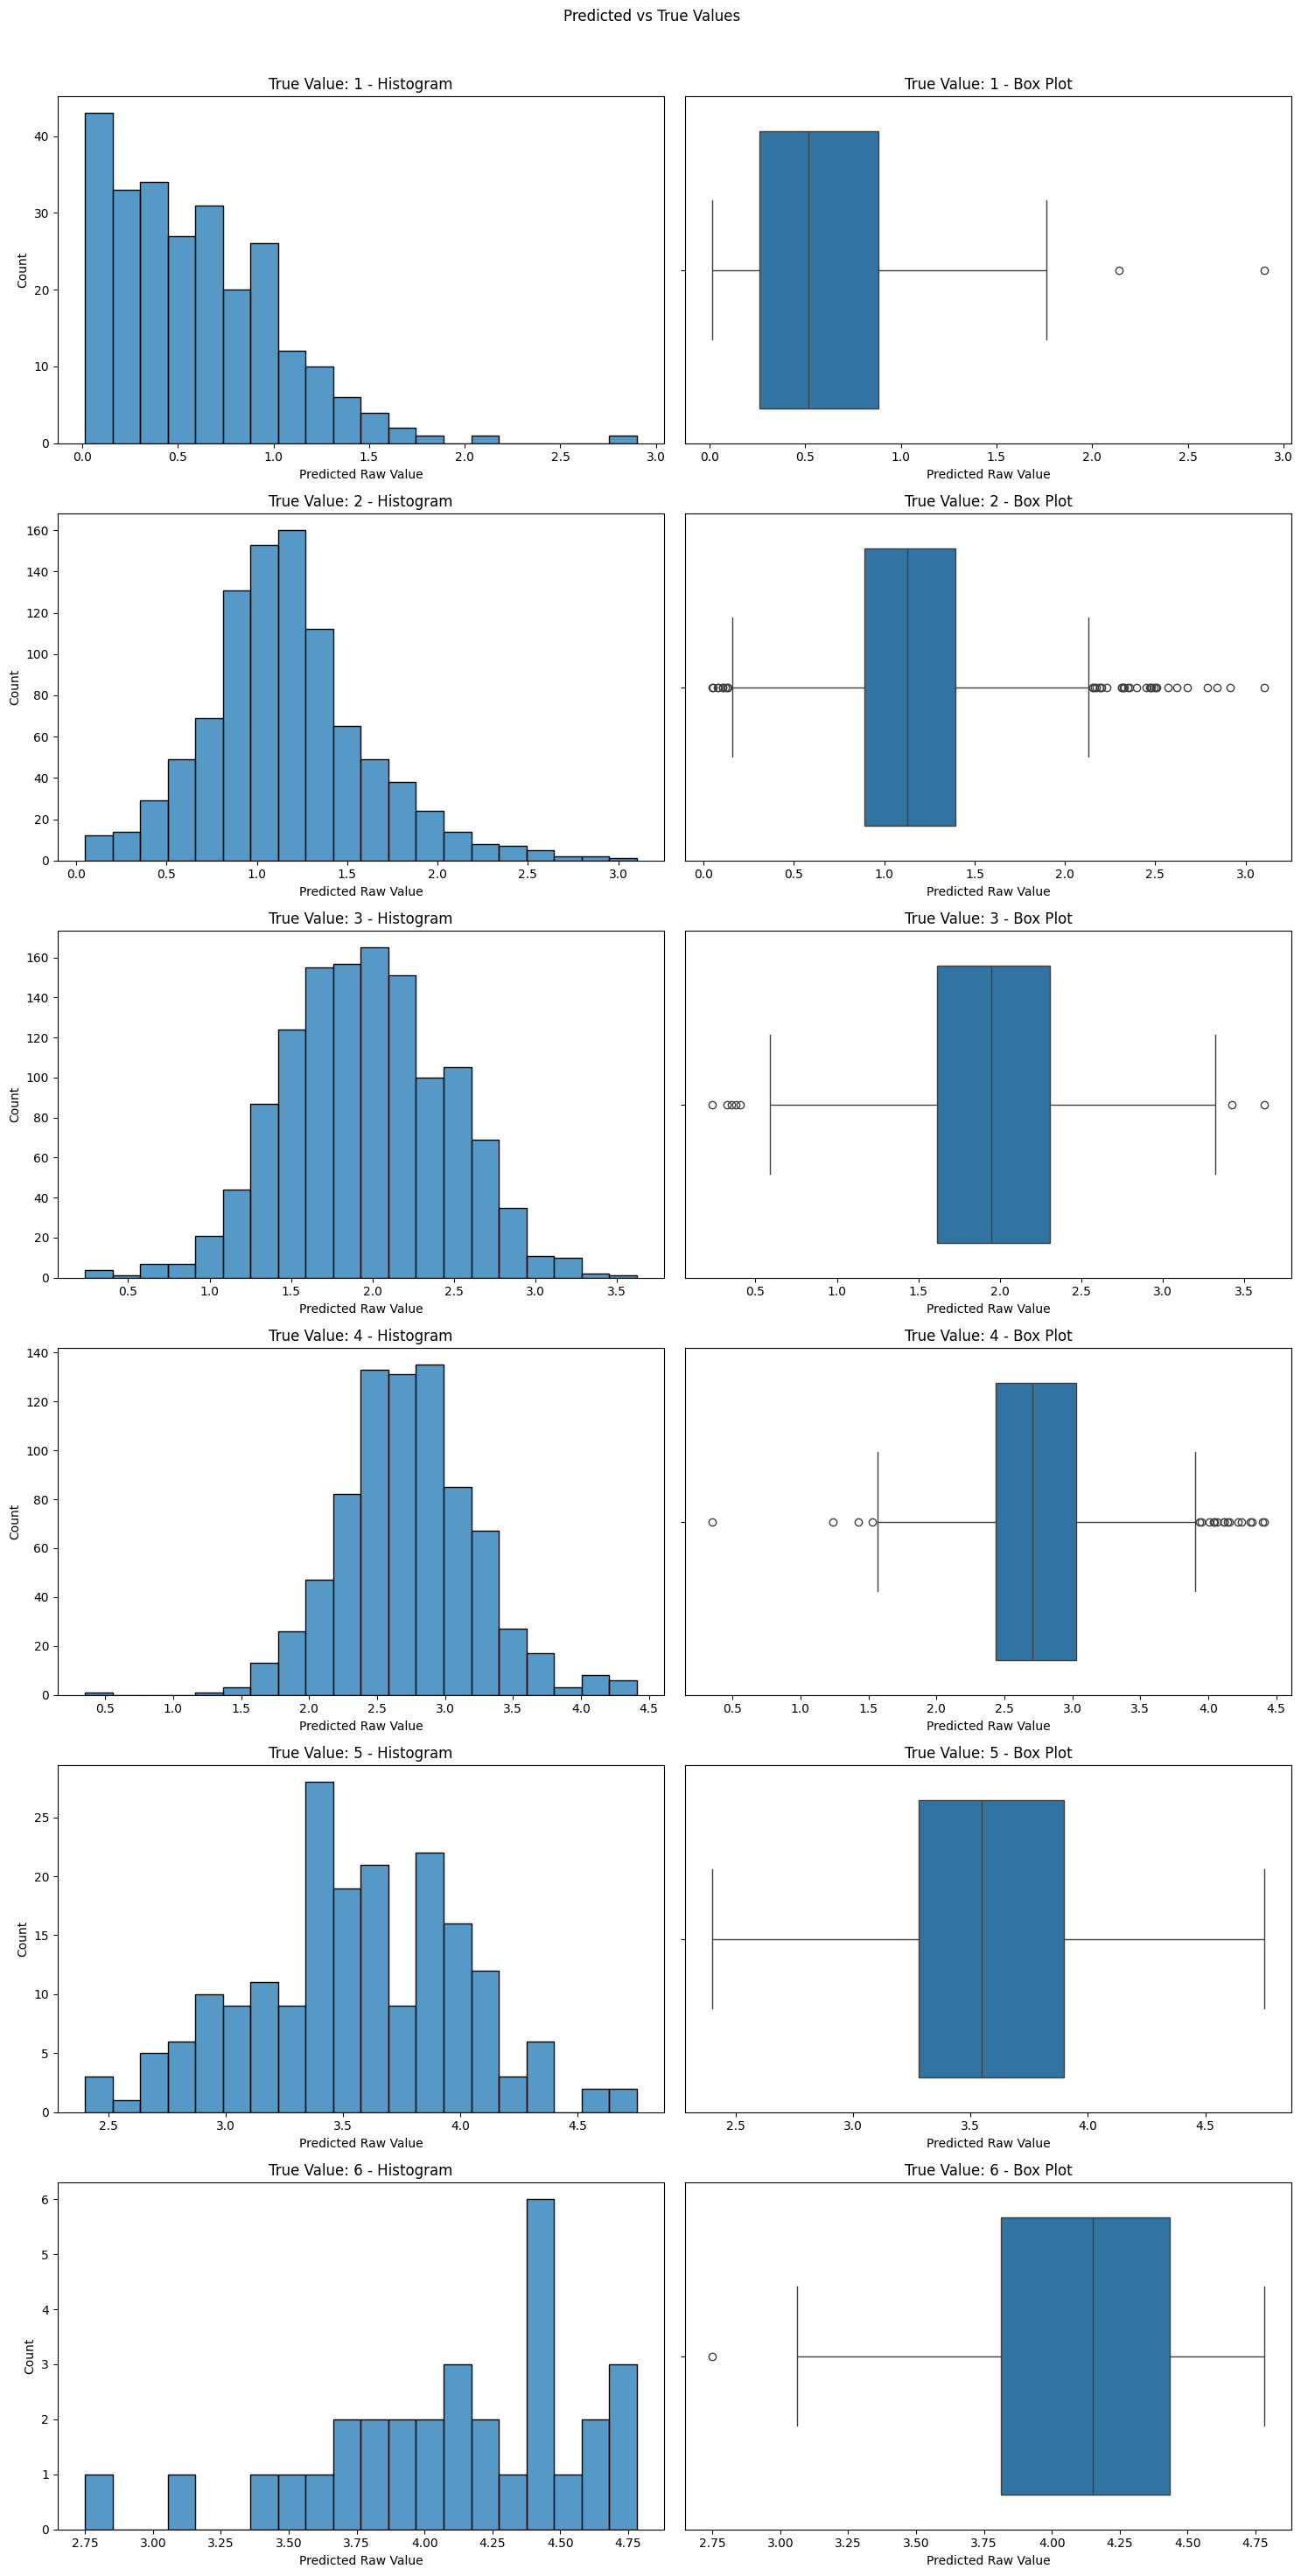

In [24]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# if COMPUTE_CV:
#     for fold in range(len(data['fold'].unique())):

#         # GET TRAIN AND VALID DATA
#         train = data[data['fold'] != fold]
#         valid = data[data['fold'] == fold].copy()

#         # ADD NEW TOKENS for ("\n") new paragraph and (" "*2) double space
#         tokenizer = AutoTokenizer.from_pretrained(PATHS.model_path)
#         tokenizer.add_tokens([AddedToken("\n", normalized=False)])
#         tokenizer.add_tokens([AddedToken(" "*2, normalized=False)])
#         tokenize = Tokenize(train, valid, tokenizer)
#         tokenized_train, tokenized_valid, _ = tokenize()

#         # REMOVE DROPOUT FROM REGRESSION
#         config = AutoConfig.from_pretrained(PATHS.model_path)
#         if USE_REGRESSION:
#             config.attention_probs_dropout_prob = 0.0
#             config.hidden_dropout_prob = 0.0
#             config.num_labels = 1
#         else: config.num_labels = CFG.num_labels

#         if LOAD_FROM:
#             model = AutoModelForSequenceClassification.from_pretrained(LOAD_FROM + f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
#         else:
#             model = AutoModelForSequenceClassification.from_pretrained(PATHS.model_path, config=config)
#             model.resize_token_embeddings(len(tokenizer))

#         # TRAIN WITH TRAINER
#         data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
#         if USE_REGRESSION: compute_metrics = compute_metrics_for_regression
#         else: compute_metrics = compute_metrics_for_classification
#         trainer = Trainer(
#             model=model,
#             args=training_args,
#             train_dataset=tokenized_train,
#             eval_dataset=tokenized_valid,
#             data_collator=data_collator,
#             tokenizer=tokenizer,
#             compute_metrics=compute_metrics
#         )
#         if LOAD_FROM is None:
#             trainer.train()

#         # Get predictions
#         y_true = valid['score'].values
#         predictions0 = trainer.predict(tokenized_valid).predictions

#         # Show original prediction values
#         valid['pred_raw'] = predictions0

#         if USE_REGRESSION:
#             predictions = predictions0.round(0) + 1
#         else:
#             predictions = predictions0.argmax(axis=1) + 1

#         valid['pred'] = predictions

#         # Plot histograms and box plots of raw predictions grouped by true values
#         fig, axes = plt.subplots(len(set(y_true)), 2, figsize=(15, 5 * len(set(y_true))))
#         fig.suptitle('Predicted vs True Values')

#         for ax_row, true_value in zip(axes, sorted(set(y_true))):
#             # Histogram
#             sns.histplot(valid[valid['score'] == true_value]['pred_raw'], bins=20, ax=ax_row[0])
#             ax_row[0].set_title(f'True Value: {true_value} - Histogram')
#             ax_row[0].set_xlabel('Predicted Raw Value')
#             ax_row[0].set_ylabel('Count')

#             # Box plot
#             sns.boxplot(x=valid[valid['score'] == true_value]['pred_raw'], ax=ax_row[1])
#             ax_row[1].set_title(f'True Value: {true_value} - Box Plot')
#             ax_row[1].set_xlabel('Predicted Raw Value')

#         plt.tight_layout(rect=[0, 0, 1, 0.97])
#         plt.show()

#         # SAVE FOLD MODEL AND TOKENIZER
#         if LOAD_FROM is None:
#             trainer.save_model(f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
#             tokenizer.save_pretrained(f'deberta-v3-small_AES2_fold_{fold}_v{VER}')

#         # SAVE OOF PREDICTIONS
#         if USE_REGRESSION:
#             valid['pred'] = predictions0 + 1
#         else:
#             COLS = [f'p{x}' for x in range(CFG.num_labels)]
#             valid[COLS] = predictions0
#         valid.to_csv(f'valid_df_fold_{fold}_v{VER}.csv', index=False)

# Overall CV Score

In [25]:
if COMPUTE_CV:
    dfs = []
    for k in range(CFG.n_splits):
        dfs.append( pd.read_csv(f'valid_df_fold_{k}_v{VER}.csv') )
        os.system(f'rm valid_df_fold_{k}_v{VER}.csv')
    dfs = pd.concat(dfs)
    dfs.to_csv(f'valid_df_v{VER}.csv',index=False)
    print('Valid OOF shape:', dfs.shape )
    display( dfs.head() )

Valid OOF shape: (17307, 7)


,essay_id,full_text,score,label,fold,pred_raw,pred
0,001bdc0,"We all heard about Venus, the planet without a...",4,3.0,0.0,2.587891,3.587891
1,0033037,The posibilty of a face reconizing computer wo...,2,1.0,0.0,1.446289,2.446289
2,0066c7c,My position on driveless cars are bad because ...,2,1.0,0.0,1.493164,2.493164
3,0072128,"Imagine a world without garages, gastations, o...",4,3.0,0.0,2.892578,3.892578
4,0079f2a,In the text the author uses facts that people ...,2,1.0,0.0,0.571777,1.571777


In [17]:
if COMPUTE_CV:
    if USE_REGRESSION:
        m = cohen_kappa_score(dfs.score.values, dfs.pred.values.clip(1,6).round(0), weights='quadratic')
    else:
        m = cohen_kappa_score(dfs.score.values, dfs.iloc[:,-6:].values.argmax(axis=1)+1, weights='quadratic')
    print('Overall QWK CV =',m)

Overall QWK CV = 0.822421347923529


# Infer Test Data
We infer test data using Hugging Face trainer and load our saved best fold models.

In [18]:
test = pd.read_csv(PATHS.test_path)
print('Test shape:', test.shape )
test.head()

Test shape: (3, 2)


,essay_id,full_text
0,000d118,Many people have car where they live. The thin...
1,000fe60,I am a scientist at NASA that is discussing th...
2,001ab80,People always wish they had the same technolog...


In [19]:
all_pred = []
test['label'] = 0.0

for fold in range(CFG.n_splits):

    # LOAD TOKENIZER
    if LOAD_FROM:
        tokenizer = AutoTokenizer.from_pretrained(LOAD_FROM + f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
    else:
        tokenizer = AutoTokenizer.from_pretrained(f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
    tokenize = Tokenize(test, test, tokenizer)
    tokenized_test, _, _ = tokenize()

    # LOAD MODEL
    if LOAD_FROM:
        model = AutoModelForSequenceClassification.from_pretrained(LOAD_FROM + f'deberta-v3-small_AES2_fold_{fold}_v{VER}')
    else:
        model = AutoModelForSequenceClassification.from_pretrained(f'deberta-v3-small_AES2_fold_{fold}_v{VER}')

    # INFER WITH TRAINER
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_test,
        data_collator=data_collator,
        tokenizer=tokenizer,
    )

    # SAVE PREDICTIONS
    predictions = trainer.predict(tokenized_test).predictions
    all_pred.append( predictions )

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

In [20]:
preds = np.mean(all_pred, axis=0)
print('Predictions shape:',preds.shape)

Predictions shape: (3,)


# Create Submission CSV

In [21]:
sub = pd.read_csv(PATHS.sub_path)
if USE_REGRESSION: sub["score"] = preds.clip(0,5).round(0)+1
else: sub["score"] = preds.argmax(axis=1)+1
sub.score = sub.score.astype('int32')
sub.to_csv('submission.csv',index=False)
print('Submission shape:', sub.shape )
sub.head()

Submission shape: (3, 2)


,essay_id,score
0,000d118,2
1,000fe60,3
2,001ab80,4
